In [7]:
from google.colab import files
uploaded = files.upload()

Saving tobacco.csv to tobacco (1).csv


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv("tobacco.csv", encoding='ISO-8859-1')


In [10]:
df

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other peoples tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed tobacco-free school guidelines (%),Schools aware of the policy for displaying tobacco-free school board (%)
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Uttarakhand,Urban,39.5,25.7,35.9,24.8,19.4,9.7,22.2,7.7,...,22.4,35.3,35.4,67.7,60.6,67.4,42.9,0.0,42.9,57.1
104,Uttarakhand,Rural,28.2,15.7,22.9,14.2,10.7,6.3,11.3,4.8,...,14.4,24.4,21.5,61.7,46.9,52.2,52.4,19.1,76.2,61.9
105,West Bengal,Total,17.3,7.1,9.3,5.2,5.4,3.6,5.5,2.9,...,21.0,25.1,19.9,73.7,48.1,49.3,94.3,65.7,85.7,91.4
106,West Bengal,Urban,18.0,6.9,9.1,4.1,5.0,2.2,2.9,1.4,...,23.4,39.3,26.3,74.1,74.8,74.1,85.7,57.1,71.4,71.4


In [11]:
df.shape

(108, 59)

In [ ]:
df.head(20)

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other peoples tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed tobacco-free school guidelines (%),Schools aware of the policy for displaying tobacco-free school board (%)
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5
5,Andaman and Nicobar Islands,Rural,26.8,5.1,10.2,4.4,4.8,1.4,3.2,1.3,...,21.7,22.0,20.5,70.6,65.0,60.4,88.0,2.4,64.2,100.0
6,Andhra Pradesh,Total,7.3,2.6,4.4,1.8,2.6,1.1,2.3,0.8,...,9.1,22.9,30.6,72.9,50.2,50.8,48.5,9.1,51.5,36.4
7,Andhra Pradesh,Urban,4.5,0.7,2.0,0.7,1.2,0.4,1.2,0.3,...,10.6,18.4,34.8,78.2,64.1,62.4,58.3,8.3,50.0,41.7
8,Andhra Pradesh,Rural,8.8,3.5,5.6,2.4,3.4,1.4,2.9,1.0,...,8.3,25.3,28.5,70.1,42.9,44.7,42.9,9.5,52.4,33.3
9,Arunachal Pradesh,Total,63.1,57.9,59.2,53.5,47.9,45.9,48.8,45.9,...,19.0,20.9,15.6,47.1,67.6,69.6,63.6,50.0,50.0,63.6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 59 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   State/UT                                                                                                                               108 non-null    object 
 1   Area                                                                                                                                   108 non-null    object 
 2   Ever tobacco users (%)                                                                                                                 108 non-null    float64
 3   Current tobacco users (%)                                             

In [14]:
# Basic Descriptive Statistics
df.describe()

,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),Ever smokeless tobacco users (%),Current smokeless tobacco users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other peoples tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed tobacco-free school guidelines (%),Schools aware of the policy for displaying tobacco-free school board (%)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,22.714815,11.322222,14.800926,9.061111,9.869444,5.856481,6.978704,4.180556,16.280556,6.075926,...,18.119444,34.342593,28.986111,71.858333,63.875926,64.870370,86.579630,37.931481,81.499074,82.418519
std,19.291991,14.848665,17.055963,12.116590,15.440664,9.905415,9.485523,8.171783,15.938101,10.130133,...,6.682345,10.642572,10.630299,8.590324,12.964855,12.062309,16.314324,18.886694,16.414756,17.785961
min,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,...,0.200000,0.300000,0.400000,39.000000,20.400000,26.600000,42.900000,0.000000,33.300000,30.800000
25%,10.700000,3.275000,5.700000,2.500000,2.400000,1.075000,2.375000,0.875000,6.975000,1.200000,...,13.800000,25.650000,21.575000,68.275000,53.525000,56.950000,79.450000,24.300000,67.600000,75.000000
50%,15.300000,5.500000,8.900000,4.300000,4.300000,2.300000,3.600000,1.800000,9.750000,1.900000,...,17.350000,35.300000,27.350000,73.000000,64.050000,64.100000,92.150000,38.350000,85.700000,88.700000
75%,26.050000,8.525000,12.375000,7.550000,7.125000,4.325000,5.575000,3.100000,17.825000,4.150000,...,21.475000,41.225000,34.725000,76.600000,71.900000,71.750000,100.000000,50.000000,94.825000,96.475000
max,91.100000,69.200000,84.500000,59.600000,77.100000,47.800000,50.200000,47.400000,72.900000,47.800000,...,40.300000,60.600000,65.300000,99.100000,99.200000,99.200000,100.000000,80.000000,100.000000,100.000000


In [15]:
# Additional Descriptive Statistics
print(df.median())
print(df.mode().iloc[0])  # Mode may have multiple values
print(df.var())
print(df.std())
print(df.skew())
print(df.kurt())

Ever tobacco users (%)                                                                                                                   15.30
Current tobacco users (%)                                                                                                                 5.50
Ever tobacco smokers (%)                                                                                                                  8.90
Current tobacco smokers (%)                                                                                                               4.30
Ever cigarette users (%)                                                                                                                  4.30
Current cigarette users (%)                                                                                                               2.30
Ever bidi users (%)                                                                                                                       3.60

<ipython-input-15-3cda590121bc>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())
<ipython-input-15-3cda590121bc>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.var())
<ipython-input-15-3cda590121bc>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.std())
<ipython-i

In [17]:
df.isnull()

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other peoples tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed tobacco-free school guidelines (%),Schools aware of the policy for displaying tobacco-free school board (%)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

State/UT                                                                                                                                 0
Area                                                                                                                                     0
Ever tobacco users (%)                                                                                                                   0
Current tobacco users (%)                                                                                                                0
Ever tobacco smokers (%)                                                                                                                 0
Current tobacco smokers (%)                                                                                                              0
Ever cigarette users (%)                                                                                                                 0
Current cigarette users (%)

In [ ]:
#identify duplicate rows
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
103    False
104    False
105    False
106    False
107    False
Length: 108, dtype: bool

In [ ]:
df.drop_duplicates()

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other peoples tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed tobacco-free school guidelines (%),Schools aware of the policy for displaying tobacco-free school board (%)
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Uttarakhand,Urban,39.5,25.7,35.9,24.8,19.4,9.7,22.2,7.7,...,22.4,35.3,35.4,67.7,60.6,67.4,42.9,0.0,42.9,57.1
104,Uttarakhand,Rural,28.2,15.7,22.9,14.2,10.7,6.3,11.3,4.8,...,14.4,24.4,21.5,61.7,46.9,52.2,52.4,19.1,76.2,61.9
105,West Bengal,Total,17.3,7.1,9.3,5.2,5.4,3.6,5.5,2.9,...,21.0,25.1,19.9,73.7,48.1,49.3,94.3,65.7,85.7,91.4
106,West Bengal,Urban,18.0,6.9,9.1,4.1,5.0,2.2,2.9,1.4,...,23.4,39.3,26.3,74.1,74.8,74.1,85.7,57.1,71.4,71.4


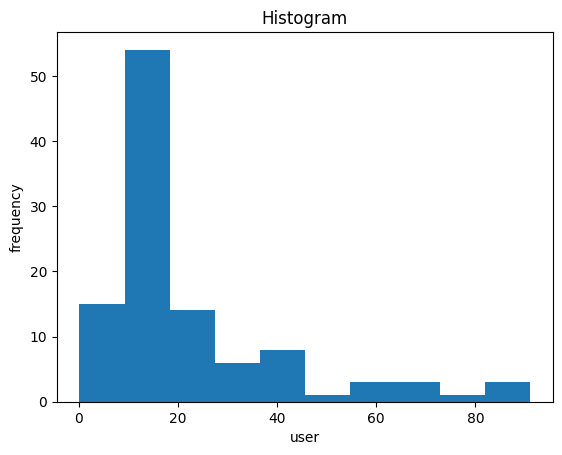

In [ ]:
plt.hist(df['Ever tobacco users (%)'])
plt.title('Histogram')
plt.xlabel('user')
plt.ylabel('frequency')
plt.show()


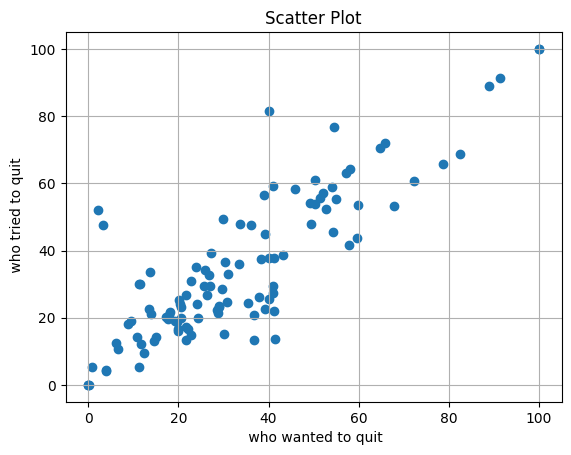

In [ ]:
plt.scatter(df['Current tobacco smokers who wanted to quit smoking now   (%)'], df['Current tobacco smokers who tried to quit smoking in the past 12 months (%)'])
plt.title('Scatter Plot')
plt.xlabel(' who wanted to quit')
plt.ylabel(' who tried to quit')
plt.grid(True)
plt.show()

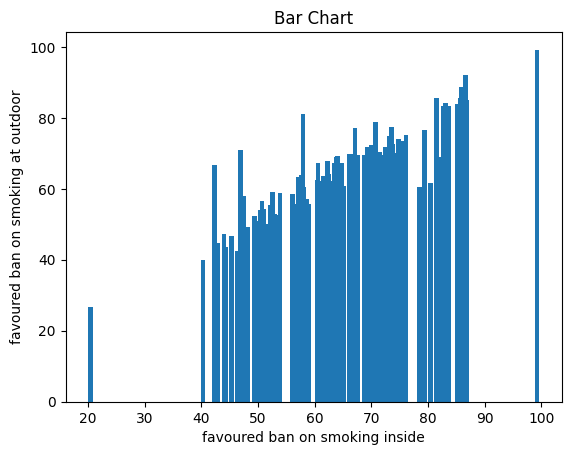

In [ ]:
plt.bar(df['Students who favoured ban on smoking inside enclosed public places (%)'], df['Students who favoured ban on smoking at outdoor public places (%)'])
plt.xlabel('favoured ban on smoking inside')
plt.ylabel('favoured ban on smoking at outdoor')
plt.title('Bar Chart')
plt.show()

In [ ]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),Ever smokeless tobacco users (%),Current smokeless tobacco users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other peoples tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed tobacco-free school guidelines (%),Schools aware of the policy for displaying tobacco-free school board (%)
Ever tobacco users (%),1.000000,0.941739,0.952078,0.892976,0.929042,0.865682,0.803983,0.629018,0.956450,0.889335,...,0.187007,0.344400,0.385847,-0.202605,0.238550,0.189316,-0.004206,0.350589,-0.116353,-0.000437
Current tobacco users (%),0.941739,1.000000,0.974194,0.982472,0.937165,0.949411,0.903880,0.774763,0.858216,0.941615,...,0.192686,0.315226,0.352790,-0.246660,0.252045,0.237960,-0.069154,0.336843,-0.185700,-0.054011
Ever tobacco smokers (%),0.952078,0.974194,1.000000,0.954772,0.977959,0.930254,0.831478,0.658106,0.862936,0.891620,...,0.162791,0.338212,0.439959,-0.173105,0.279276,0.275283,-0.049590,0.312718,-0.169216,-0.060641
Current tobacco smokers (%),0.892976,0.982472,0.954772,1.000000,0.903908,0.960878,0.918751,0.814619,0.785409,0.905381,...,0.174872,0.279742,0.297203,-0.301755,0.210085,0.229350,-0.104648,0.279417,-0.208684,-0.087975
Ever cigarette users (%),0.929042,0.937165,0.977959,0.903908,1.000000,0.930284,0.793779,0.620531,0.869200,0.884355,...,0.129311,0.330696,0.483781,-0.099095,0.357721,0.331318,0.006865,0.311899,-0.160001,-0.038145
Current cigarette users (%),0.865682,0.949411,0.930254,0.960878,0.930284,1.000000,0.925415,0.841124,0.788229,0.917556,...,0.141076,0.227711,0.305656,-0.292643,0.275563,0.267791,-0.048109,0.277759,-0.217809,-0.070429
Ever bidi users (%),0.803983,0.903880,0.831478,0.918751,0.793779,0.925415,1.000000,0.951144,0.708914,0.885608,...,0.232816,0.107767,0.139810,-0.433647,0.191519,0.148323,-0.147690,0.260297,-0.268573,-0.081358
Current bidi users (%),0.629018,0.774763,0.658106,0.814619,0.620531,0.841124,0.951144,1.000000,0.554924,0.803221,...,0.209447,0.005805,-0.027769,-0.489798,0.134982,0.096284,-0.140719,0.209018,-0.279931,-0.085946
Ever smokeless tobacco users (%),0.956450,0.858216,0.862936,0.785409,0.869200,0.788229,0.708914,0.554924,1.000000,0.888599,...,0.142754,0.359070,0.378702,-0.109962,0.289594,0.192129,0.110234,0.361818,-0.063708,0.069289
Current smokeless tobacco users (%),0.889335,0.941615,0.891620,0.905381,0.884355,0.917556,0.885608,0.803221,0.888599,1.000000,...,0.160938,0.268302,0.285782,-0.216037,0.327550,0.251448,0.016121,0.372339,-0.192494,0.001175


<ipython-input-18-80d9ff0e572b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


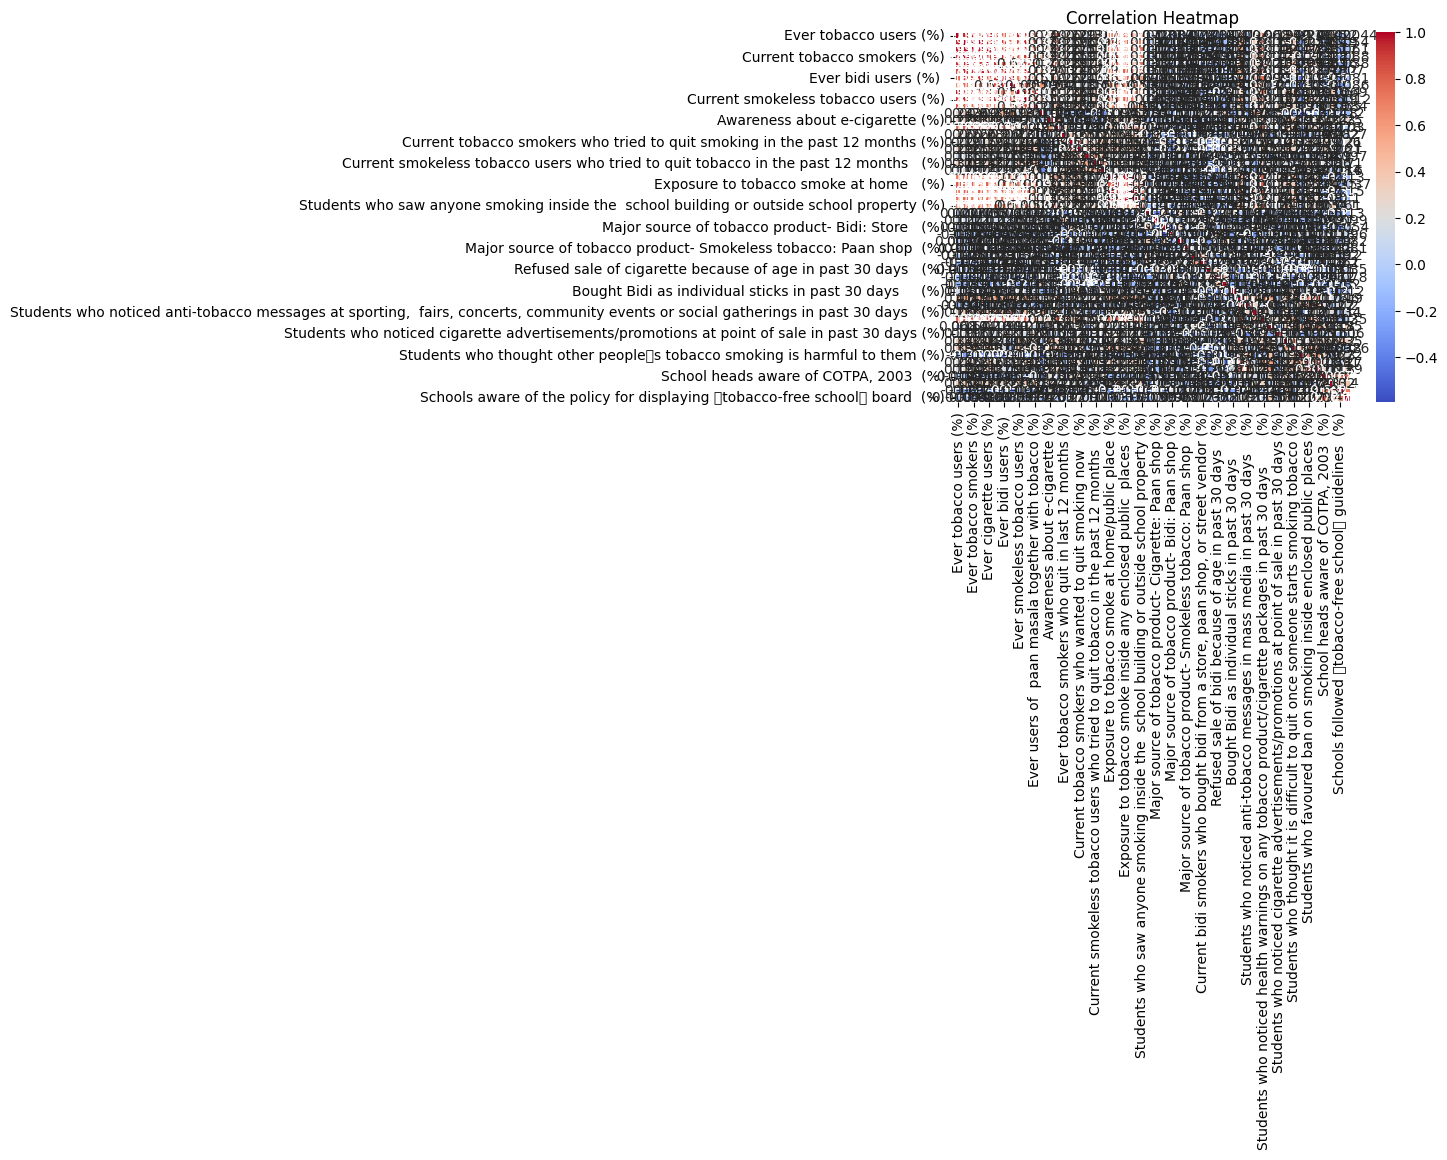

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()